# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

Dataset Shape: (1258, 7)

First few rows of the data:
           Date      Open      High       Low    Close*  Adj Close**  \
0  Apr 28, 2023  33797.43  34104.56  33728.40  34098.16     34098.16   
1  Apr 27, 2023  33381.66  33859.75  33374.65  33826.16     33826.16   
2  Apr 26, 2023  33596.34  33645.83  33235.85  33301.87     33301.87   
3  Apr 25, 2023  33828.34  33875.49  33525.39  33530.83     33530.83   
4  Apr 24, 2023  33805.04  33891.15  33726.09  33875.40     33875.40   

      Volume  
0  354310000  
1  343240000  
2  321170000  
3  297880000  
4  252020000  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 

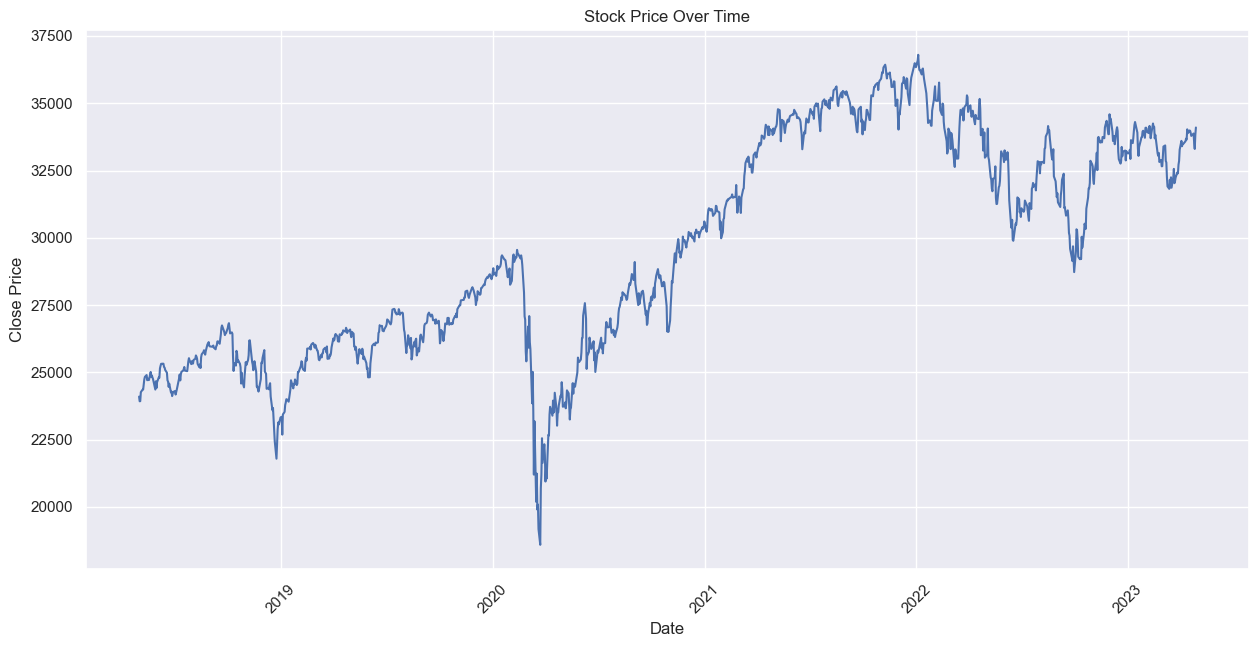

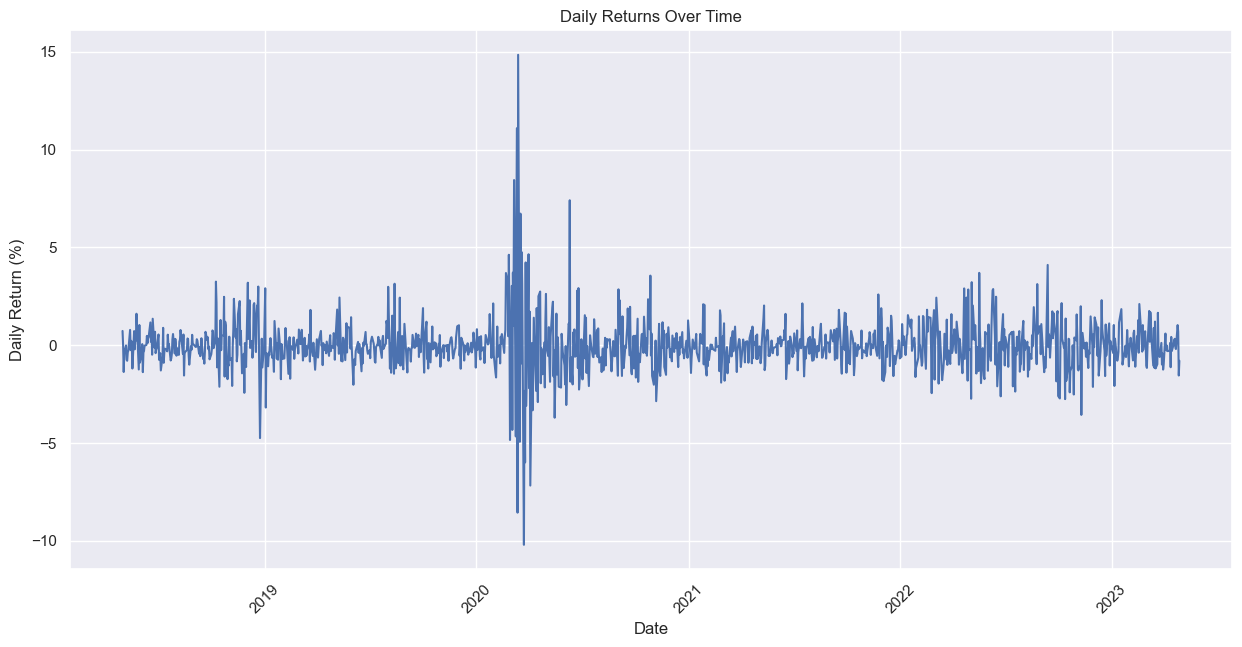

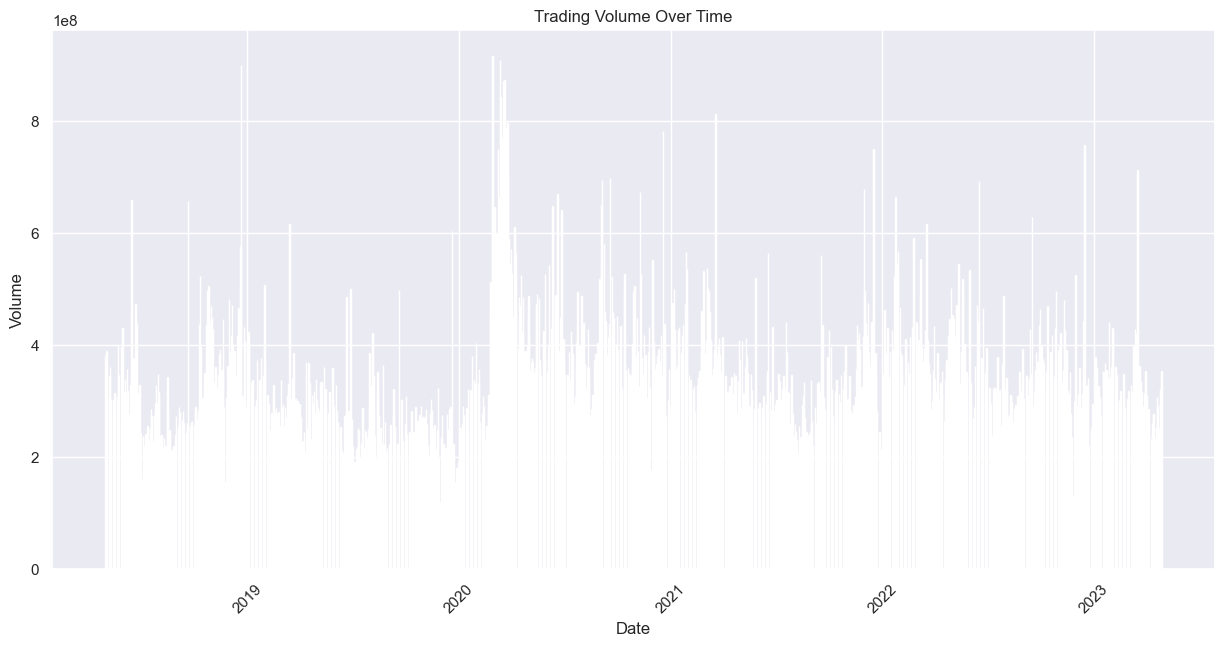

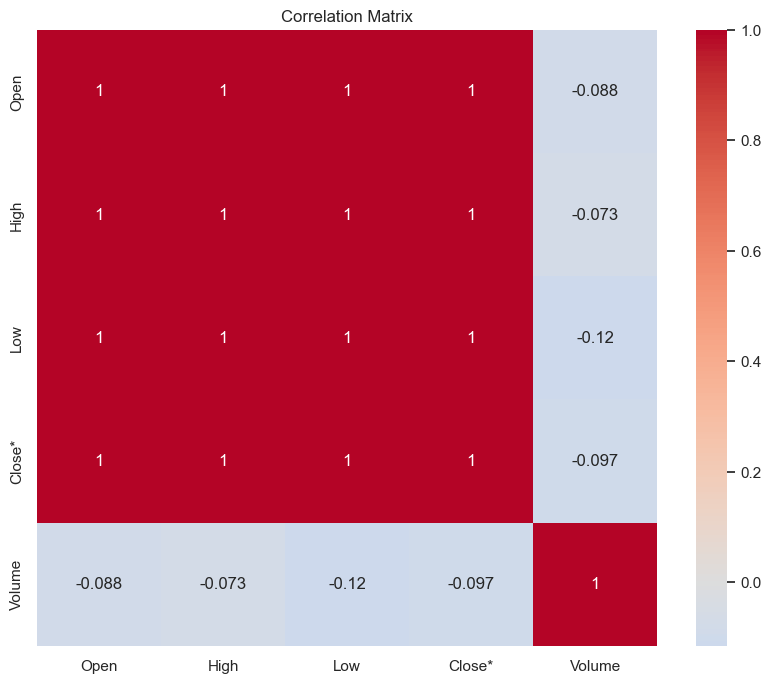

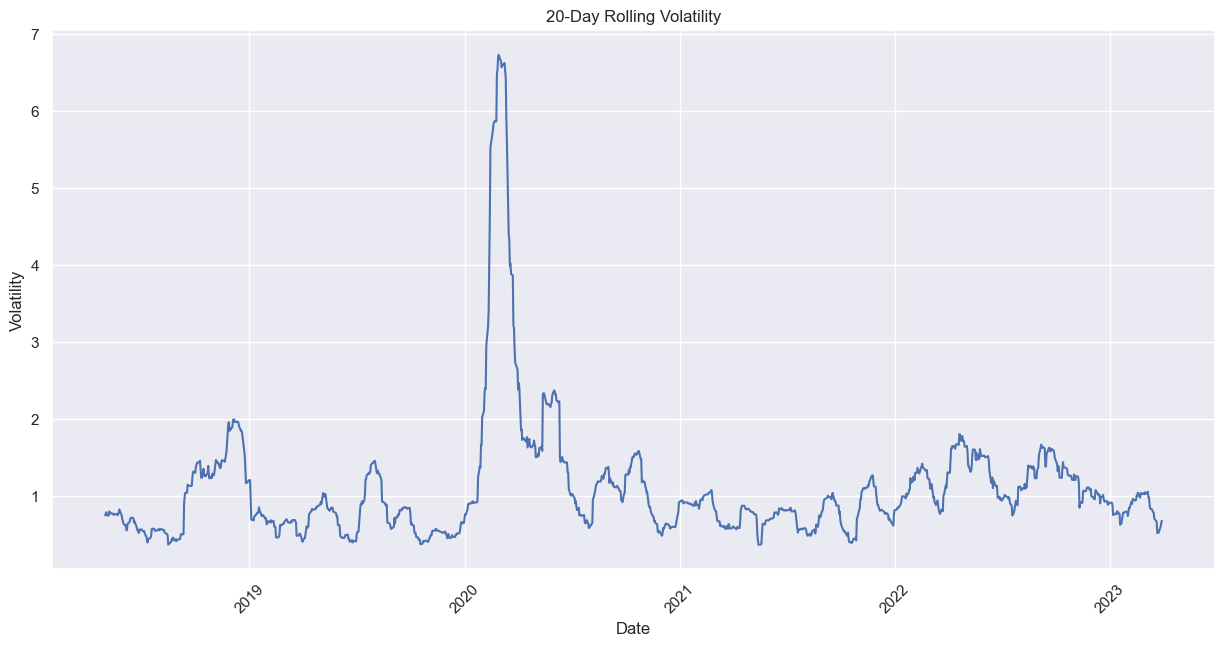

In [4]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations - correcting the style setting
plt.style.use('default')  # using default style instead of seaborn
sns.set_theme()  # This is the correct way to set seaborn theme

# Read the data
df = pd.read_excel('yahoo_data.xlsx')

# Basic Data Exploration
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the data:")
print(df.head())

# Data Info
print("\nDataset Information:")
print(df.info())

# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Create date features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Visualizations
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Close*'])
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Daily Returns
df['Daily_Return'] = df['Close*'].pct_change() * 100
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Daily_Return'])
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Volume Analysis
plt.figure(figsize=(15, 7))
plt.bar(df['Date'], df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Correlation Analysis
correlation_matrix = df[['Open', 'High', 'Low', 'Close*', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Calculate volatility (20-day rolling standard deviation)
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()

# Plot volatility
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Volatility'])
plt.title('20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Missing Values Before Treatment:
Date             0
Open             0
High             0
Low              0
Close*           0
Adj Close**      0
Volume           0
Year             0
Month            0
Day              0
DayOfWeek        0
Daily_Return     1
Volatility      20
dtype: int64

Missing Values After Treatment:
Date             0
Open             0
High             0
Low              0
Close*           0
Adj Close**      0
Volume           0
Year             0
Month            0
Day              0
DayOfWeek        0
Daily_Return     1
Volatility      20
dtype: int64


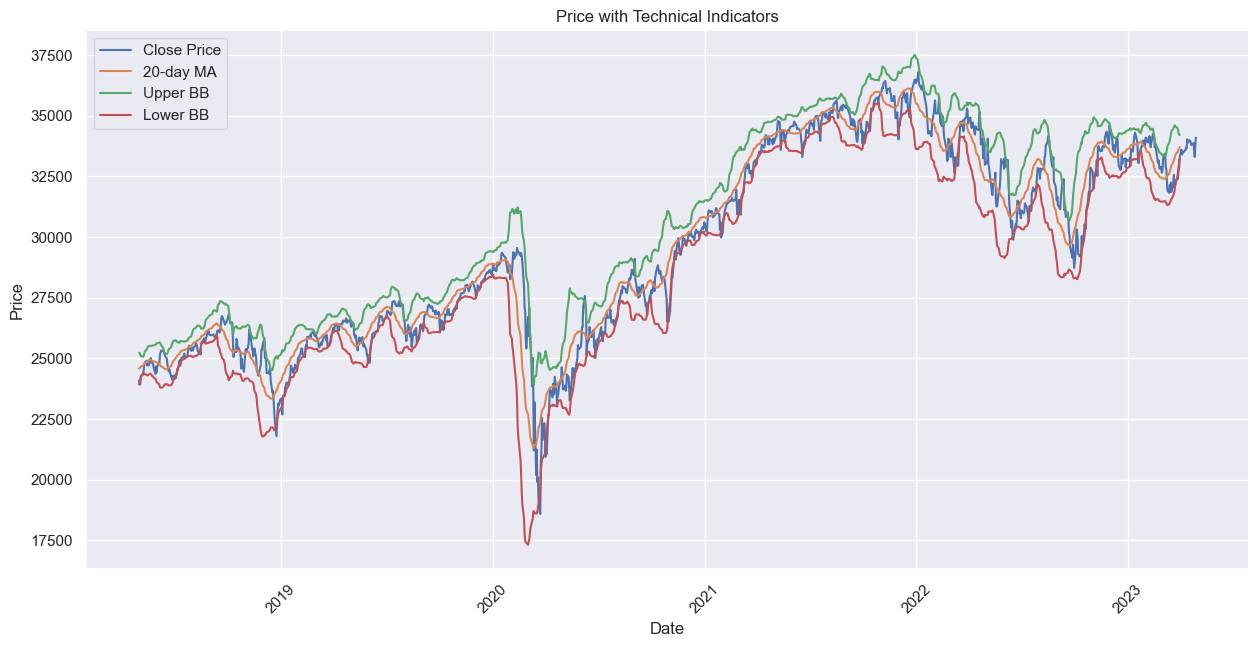

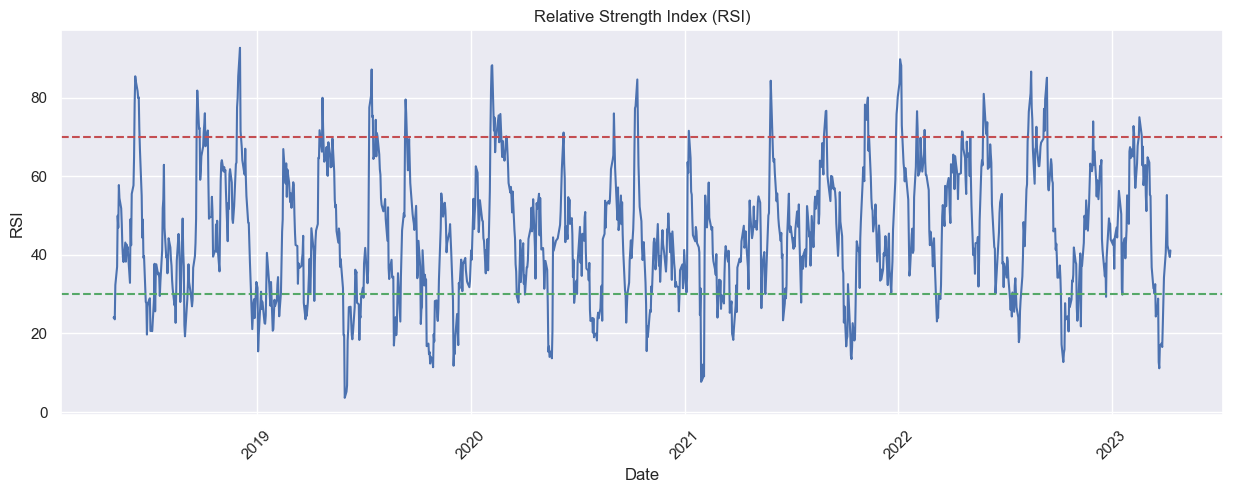


New Features Created:
1. Moving Averages: MA5, MA20, MA50
2. Technical Indicators: RSI, MACD, Signal Line
3. Bollinger Bands: BB_middle, BB_upper, BB_lower
4. Momentum Indicators: Price_Momentum
5. Volume Indicators: Volume_MA5, Volume_MA20

Correlation with Close Price:
Close*            1.000000
MA20              0.977460
MACD              0.255350
RSI               0.216189
Price_Momentum    0.094834
Volume_MA20       0.038174
Name: Close*, dtype: float64


In [5]:
# -------------------- PHASE 2: DATA PREPROCESSING --------------------

# 1. Handle Missing Values
print("Missing Values Before Treatment:")
print(df.isnull().sum())

# If there are any missing values, fill them appropriately
df['Close*'].fillna(method='ffill', inplace=True)  # Forward fill for price data
df['Volume'].fillna(df['Volume'].mean(), inplace=True)  # Mean for volume

print("\nMissing Values After Treatment:")
print(df.isnull().sum())

# 2. Handle Outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Instead of removing, we'll cap the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier treatment to returns and volume
df = handle_outliers(df, 'Daily_Return')
df = handle_outliers(df, 'Volume')

# 3. Feature Scaling
scaler = StandardScaler()
price_columns = ['Open', 'High', 'Low', 'Close*', 'Adj Close**']
df_scaled = df.copy()
df_scaled[price_columns] = scaler.fit_transform(df[price_columns])

# -------------------- PHASE 3: FEATURE ENGINEERING --------------------

# 1. Technical Indicators

# Moving Averages
df['MA5'] = df['Close*'].rolling(window=5).mean()
df['MA20'] = df['Close*'].rolling(window=20).mean()
df['MA50'] = df['Close*'].rolling(window=50).mean()

# Relative Strength Index (RSI)
def calculate_rsi(data, periods=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['Close*'])

# MACD
def calculate_macd(data, fast_period=12, slow_period=26, signal_period=9):
    fast_ma = data.ewm(span=fast_period, adjust=False).mean()
    slow_ma = data.ewm(span=slow_period, adjust=False).mean()
    macd = fast_ma - slow_ma
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal

df['MACD'], df['Signal_Line'] = calculate_macd(df['Close*'])

# Bollinger Bands
df['BB_middle'] = df['Close*'].rolling(window=20).mean()
df['BB_upper'] = df['BB_middle'] + 2*df['Close*'].rolling(window=20).std()
df['BB_lower'] = df['BB_middle'] - 2*df['Close*'].rolling(window=20).std()

# Price Momentum
df['Price_Momentum'] = df['Close*'].pct_change(periods=5)

# Trading Volume Features
df['Volume_MA5'] = df['Volume'].rolling(window=5).mean()
df['Volume_MA20'] = df['Volume'].rolling(window=20).mean()

# Visualize new features
plt.figure(figsize=(15, 7))
plt.plot(df['Date'], df['Close*'], label='Close Price')
plt.plot(df['Date'], df['MA20'], label='20-day MA')
plt.plot(df['Date'], df['BB_upper'], label='Upper BB')
plt.plot(df['Date'], df['BB_lower'], label='Lower BB')
plt.title('Price with Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualize RSI
plt.figure(figsize=(15, 5))
plt.plot(df['Date'], df['RSI'])
plt.axhline(y=70, color='r', linestyle='--')
plt.axhline(y=30, color='g', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Save processed data
df.to_csv('processed_stock_data.csv', index=False)

# Print summary of new features
print("\nNew Features Created:")
print("1. Moving Averages: MA5, MA20, MA50")
print("2. Technical Indicators: RSI, MACD, Signal Line")
print("3. Bollinger Bands: BB_middle, BB_upper, BB_lower")
print("4. Momentum Indicators: Price_Momentum")
print("5. Volume Indicators: Volume_MA5, Volume_MA20")

# Show correlation of new features with price
technical_features = ['MA20', 'RSI', 'MACD', 'Price_Momentum', 'Volume_MA20']
correlation_with_price = df[technical_features + ['Close*']].corr()['Close*'].sort_values(ascending=False)
print("\nCorrelation with Close Price:")
print(correlation_with_price)

Building Prediction Model...

Classification Model Results:
Accuracy Score: 0.512396694214876

Feature Importance:
MA5: 0.1140
MA20: 0.1196
MA50: 0.1143
RSI: 0.1357
MACD: 0.1189
Volume_MA5: 0.1406
Volume_MA20: 0.1219
Price_Momentum: 0.1350


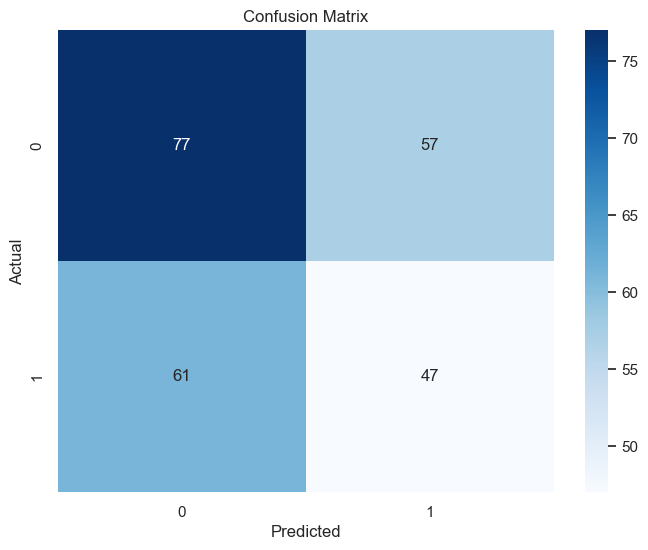


Building Clustering Model...


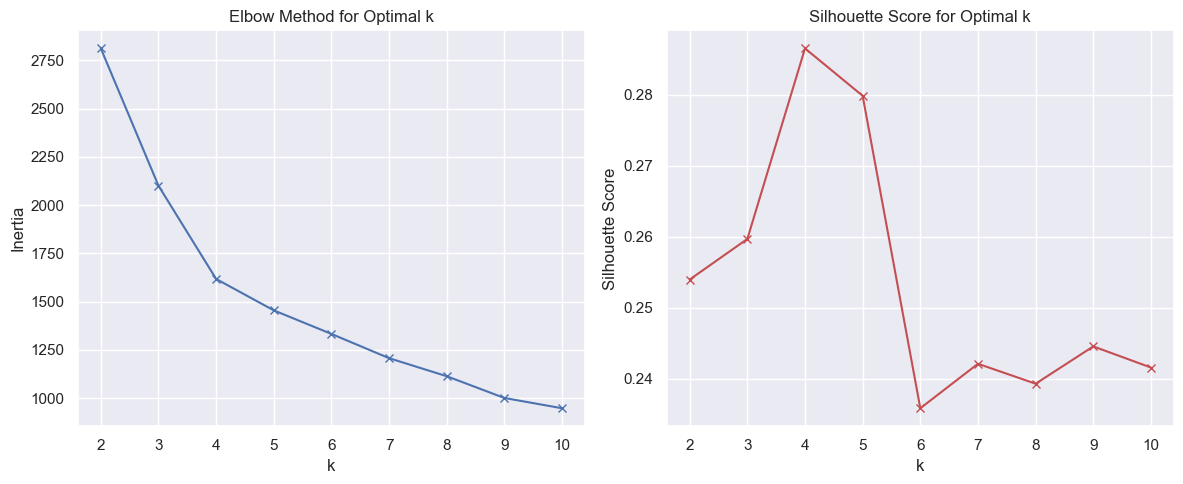

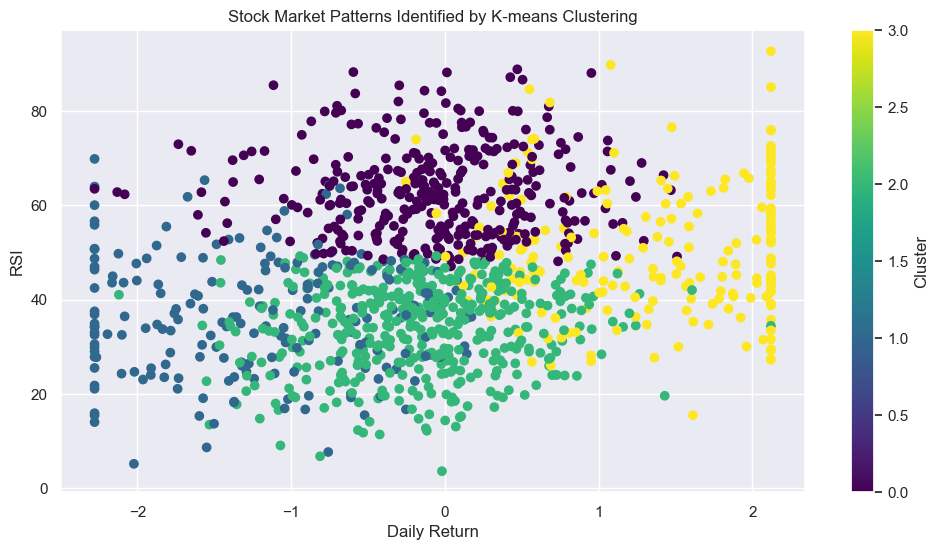


Cluster Analysis:
        Daily_Return          RSI               Volume             
                mean   std   mean    std          mean          std
Cluster                                                            
0              -0.06  0.62  62.84   9.50  3.018531e+08  51708207.05
1              -1.21  0.73  36.54  12.24  4.387449e+08  72393232.64
2              -0.15  0.59  34.17   9.31  2.891757e+08  54725722.82
3               1.32  0.69  50.25  13.39  4.190323e+08  77268943.08

Cross-validation scores: [0.46280992 0.47107438 0.38842975 0.52892562 0.55186722]
Average CV Score: 0.4806213778677

Detailed Cluster Metrics:
            Size  Avg Daily Return  Volatility    Avg Volume  Avg RSI
Cluster 0  343.0             -0.06        0.62  3.018531e+08    62.84
Cluster 1  203.0             -1.21        0.73  4.387449e+08    36.54
Cluster 2  454.0             -0.15        0.59  2.891757e+08    34.17
Cluster 3  209.0              1.32        0.69  4.190323e+08    50.25


In [7]:
# -------------------- PHASE 4: MODEL BUILDING --------------------

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed data
df = pd.read_csv('processed_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Drop rows with NaN values that were created during feature engineering
df = df.dropna()

# 1. PREDICTION MODEL (Using Random Forest for price direction prediction)
print("Building Prediction Model...")

# Create target variable (1 if price goes up, 0 if down)
df['Target'] = (df['Close*'].shift(-1) > df['Close*']).astype(int)

# Select features for prediction
features = ['MA5', 'MA20', 'MA50', 'RSI', 'MACD', 'Volume_MA5', 'Volume_MA20', 'Price_Momentum']
X = df[features]
y = df['Target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate classification model
print("\nClassification Model Results:")
print("Accuracy Score:", accuracy_score(y_test, rf_predictions))
print("\nFeature Importance:")
for feature, importance in zip(features, rf_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. CLUSTERING MODEL (Using K-means for pattern recognition)
print("\nBuilding Clustering Model...")

# Prepare data for clustering
cluster_features = ['Daily_Return', 'RSI', 'Volume']
X_cluster = df[cluster_features]

# Scale the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.tight_layout()
plt.show()

# Apply K-means with optimal k (let's use 4 clusters)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualize clusters
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['Daily_Return'], df['RSI'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Daily Return')
plt.ylabel('RSI')
plt.title('Stock Market Patterns Identified by K-means Clustering')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Analyze cluster characteristics
print("\nCluster Analysis:")
cluster_stats = df.groupby('Cluster')[cluster_features].agg(['mean', 'std']).round(2)
print(cluster_stats)

# Save models and predictions
import joblib
joblib.dump(rf_model, 'stock_prediction_model.joblib')
joblib.dump(kmeans, 'stock_clustering_model.joblib')

# -------------------- PHASE 5: MODEL EVALUATION --------------------

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Calculate additional metrics for each cluster
cluster_metrics = []
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    metrics = {
        'Size': len(cluster_data),
        'Avg Daily Return': cluster_data['Daily_Return'].mean(),
        'Volatility': cluster_data['Daily_Return'].std(),
        'Avg Volume': cluster_data['Volume'].mean(),
        'Avg RSI': cluster_data['RSI'].mean()
    }
    cluster_metrics.append(pd.Series(metrics, name=f'Cluster {i}'))

cluster_metrics = pd.concat(cluster_metrics, axis=1).T
print("\nDetailed Cluster Metrics:")
print(cluster_metrics.round(2))